In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [91]:
Hv = [50, -50, -100, 100, -150, 150, -200, 200, -250, 250, -300, 300 ]
Center = [1541, 1551, 1588, 1641, 1591, 1665, 1593, 1669, 1580, 1672, 1582, 1672 ]
Fwhm = [21.91, 20.04, 11.24, 14.87, 9.969, 13.11, 9.120, 10.93, 7.857, 12.10, 6.804, 8.845 ]
Resolution = np.array(Fwhm)/np.array(Center)


<ErrorbarContainer object of 3 artists>

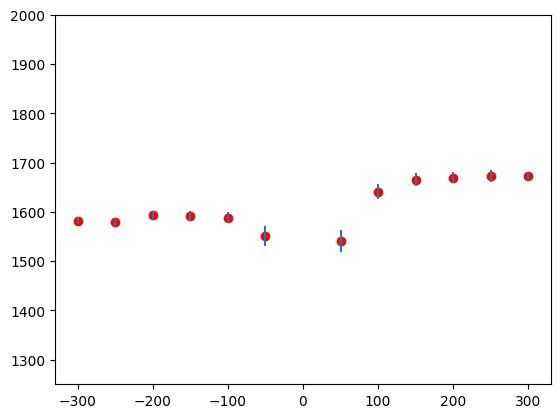

In [92]:
plt.scatter(Hv,Center, c = 'red')
plt.ylim(1250,2000)
plt.errorbar(Hv,Center,Fwhm,  linestyle='None')

[0.01421804 0.0129207  0.00707809 0.00906155 0.00626587 0.00787387
 0.00572505 0.00654883 0.00497278 0.00723684 0.00430088 0.00529007]


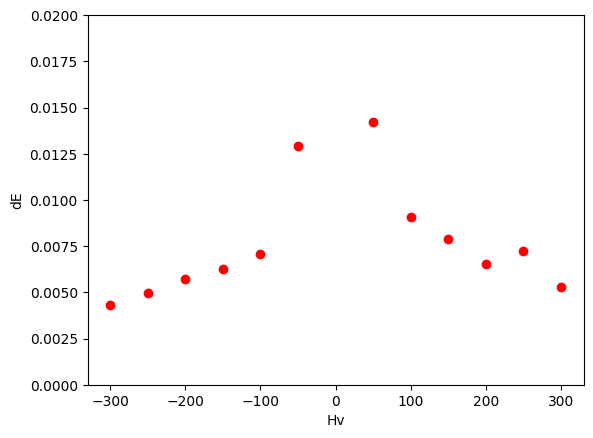

In [93]:
plt.scatter(Hv,Resolution, c = 'red')
plt.ylabel('dE')
plt.xlabel('Hv')
plt.ylim(0,0.02)
print(Resolution)

In [94]:
#Calibrazione MCA in energia

In [95]:
Canale = np.array([1496.09, 1595.22, 1690.23])
delta = np.array([7.85, 7.04, 7.95])
Energie = np.array([5.157, 5.486, 5.805])

In [96]:
def retta(x,a,b):
    return a*x + b

In [97]:
x = np.linspace(0,1800,400)


0.003337660782439549


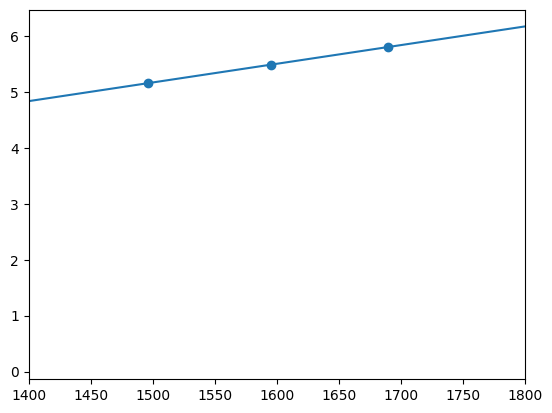

In [98]:
plt.scatter(Canale,Energie)
popt, pcov = opt.curve_fit(retta,Canale,Energie)
plt.plot(x, retta(x,popt[0], popt[1]))
plt.xlim(1400,1800)
print(popt[0])
plt.show()

In [99]:
Resolution_Am = delta/Canale
print(Resolution_Am)


[0.00524701 0.00441318 0.0047035 ]


In [100]:
print(popt[0])
print(popt[1])

0.003337660782439549
0.16294715411145708


In [101]:
#Picco Cesio 137 (aumento del gain di un fattore 5)
Energia_Cesio = popt[0]*876.40/5 + popt[1]
print(Energia_Cesio)

0.7479723360574613


In [102]:
Res_Pu = Resolution_Am[0]*5.157
print(Res_Pu)

0.027058833358955682


In [103]:
def parabola (x,a,b,c):
    return (a*x-b)**2+c

In [104]:
from scipy.optimize import curve_fit

In [105]:
Mca = np.linspace(0,2048,2048)
def gaussiana(x, a, mu, sigma):
    return a * np.exp(-((x - mu)**2) / (2 * sigma**2))
def somma_gauss(x,a1,mu1,sigma1,a2,mu2,sigma2):
    return gaussiana(x,a1,mu1,sigma1) + gaussiana(x,a2,mu2,sigma2)
def somma_gauss3(x,a1,mu1,sigma1,a2,mu2,sigma2,a3,mu3,sigma3):
    return gaussiana(x,a1,mu1,sigma1) + gaussiana(x,a2,mu2,sigma2) + gaussiana(x,a3,mu3,sigma3)
def sigmoide(x, L, x0, k, C):
    return C +  L / (1 + np.exp((x - x0)/-k)) 

In [106]:
import pandas as pd
import numpy as np
import scipy.stats as st
import landaupy

def leggi_da_excel(file_excel, foglio_excel):
    # Leggi i dati dal foglio Excel
    dati_excel = pd.read_excel(file_excel, sheet_name=foglio_excel)
    
    # Converti i dati in una matrice (lista di liste)
    matrice_dati = dati_excel.values.tolist()
    
    return matrice_dati

# Percorso del file Excel
file_excel = r"Plutonio.xlsx"
# Nome del foglio Excel da cui leggere i dati
foglio_excel = "Foglio1"

# Chiamata alla funzione per leggere i dati e metterli in una matrice
matrice_dati = leggi_da_excel(file_excel, foglio_excel)

# Stampare la matrice per verificare che i dati siano stati letti correttamente
print(matrice_dati)

[['Spettro Tripla', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

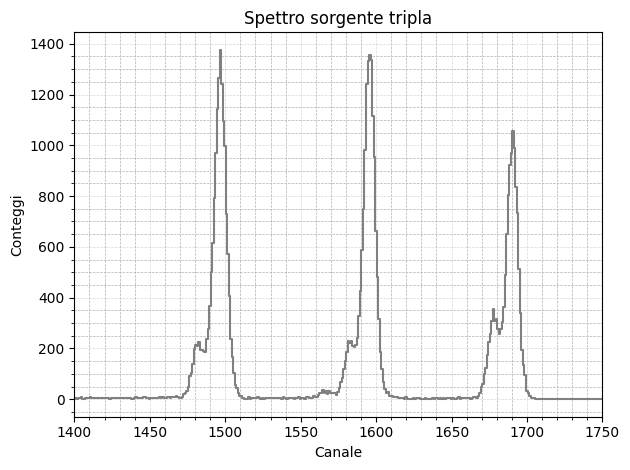

In [170]:
#plt.scatter(Mca,matrice_dati[1])
plt.plot(Mca, matrice_dati[1], drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
plt.xlim(1400,1750)
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Spettro sorgente tripla')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)


In [155]:
y = np.array(matrice_dati[1])
x_min = 1590
x_max = 1610
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1590,7])
popt_1, pcov_1 = curve_fit(gaussiana,x_fit,y_fit,p0)

[1372.68766843 1595.59921389    3.59010122]
[11.8892861   0.03778602  0.04179076]
Chi-quadro: 67.4488523690731
Gradi di libertà: 17
p-value: 5.901772026639662e-08


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\197865198.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_1)))


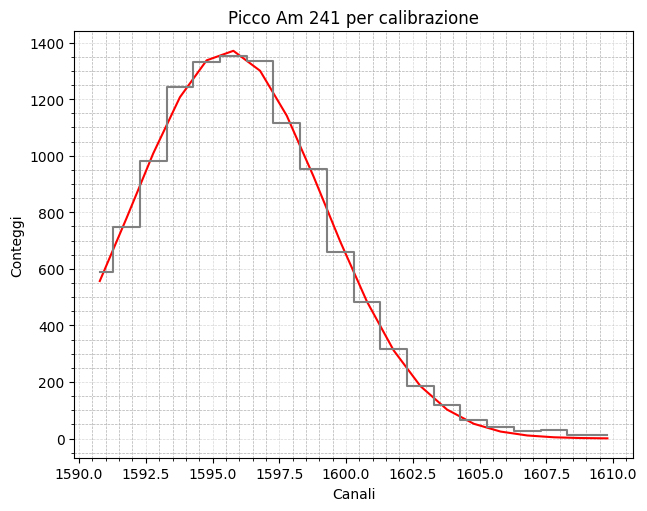

In [156]:
plt.plot(x_fit,gaussiana(x_fit,*popt_1), c='red')
#plt.scatter(x_fit,y_fit)
print(popt_1)
print(np.diag(np.sqrt(pcov_1)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
sigma = np.sqrt(y_fit)
residuals = y_fit - gaussiana(x_fit, *popt_1)
chi_squared = np.sum((residuals / sigma)**2)
plt.xlabel('Canali')
plt.ylabel('Conteggi')
plt.title('Picco Am 241 per calibrazione')


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_1)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

In [253]:
y = np.array(matrice_dati[1])
x_min = 1560
x_max = 1602
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([400,1580,0.5,1400,1595,3,100,1560,5])
popt_s1, pcov_s1 = curve_fit(somma_gauss3,x_fit,y_fit,p0)


Chi-quadro: 29.44934146602687
Gradi di libertà: 33
p-value: 0.6446296809548041
[ 223.83385837 1583.35381842    4.1537704  1371.74320153 1595.64476182
    3.53592856   31.33776546 1566.37791833    4.26218109]
[7.92142087 0.22642697 0.27022616 8.43946069 0.03457883 0.03761808
 7.93828573 1.32503198 1.64341606]


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\3424288257.py:34: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_s1)))


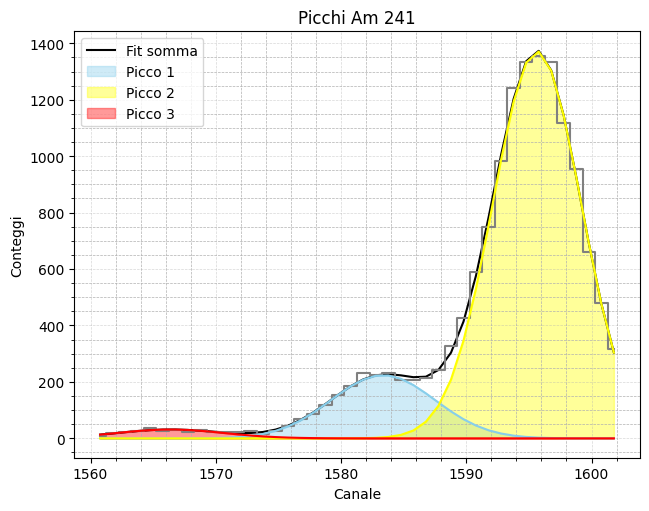

In [254]:
plt.plot(x_fit,somma_gauss3(x_fit,*popt_s1), c='black', label='Fit somma')
#plt.scatter(x_fit,y_fit)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray')
plt.plot(x_fit,gaussiana(x_fit,popt_s1[0],popt_s1[1],popt_s1[2]), c='skyblue')
plt.plot(x_fit,gaussiana(x_fit,popt_s1[3],popt_s1[4],popt_s1[5]), c='yellow')
plt.plot(x_fit,gaussiana(x_fit,popt_s1[6],popt_s1[7],popt_s1[8]), c='red')
plt.fill_between(x_fit,gaussiana(x_fit,popt_s1[0],popt_s1[1],popt_s1[2]), color='skyblue', alpha=0.4, label="Picco 1")
plt.fill_between(x_fit,gaussiana(x_fit,popt_s1[3],popt_s1[4],popt_s1[5]), color='yellow', alpha=0.4, label="Picco 2")
plt.fill_between(x_fit,gaussiana(x_fit,popt_s1[6],popt_s1[7],popt_s1[8]), color='red', alpha=0.4, label="Picco 3")
plt.legend()
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Picchi Am 241')
sigma = np.sqrt(y_fit)
residuals = y_fit - somma_gauss3(x_fit, *popt_s1)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_s1)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)
print(popt_s1)
print(np.diag(np.sqrt(pcov_s1)))

(1550.0, 1600.0)

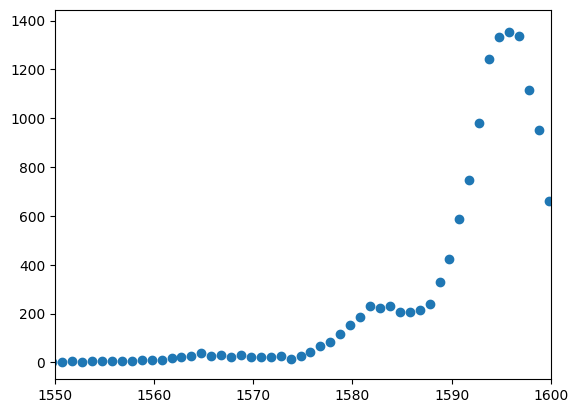

In [112]:
plt.scatter(Mca,matrice_dati[1])
plt.xlim(1550,1600)

In [159]:
y = np.array(matrice_dati[1])
x_min = 1490
x_max = 1510
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1490,7])
popt_2, pcov_2 = curve_fit(gaussiana,x_fit,y_fit,p0)


[1300.8197642  1496.60435051    3.99582302]
[14.74348495  0.05388863  0.05880854]


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\1758933214.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_2)))


Chi-quadro: 36.06397358048274
Gradi di libertà: 17
p-value: 0.00449718103480512
[1300.8197642  1496.60435051    3.99582302]
[14.74348495  0.05388863  0.05880854]


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\1758933214.py:29: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_2)))


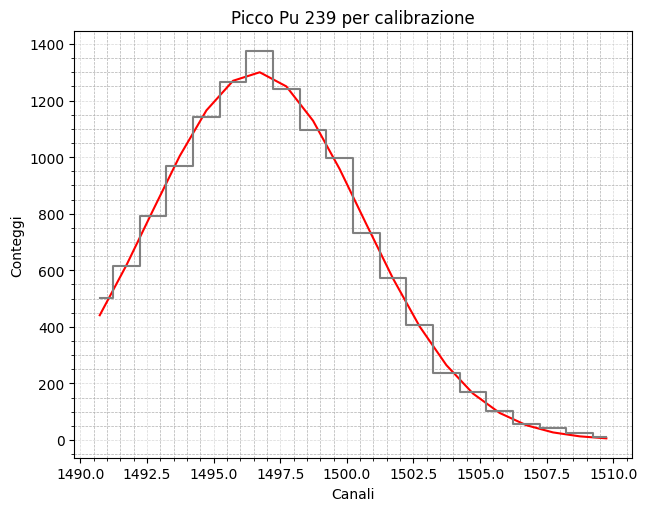

In [160]:
plt.plot(x_fit,gaussiana(x_fit,*popt_2), c='red')
print(popt_2)
print(np.diag(np.sqrt(pcov_2)))
#plt.scatter(x_fit,y_fit)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
sigma = np.sqrt(y_fit)
residuals = y_fit - gaussiana(x_fit, *popt_2)
chi_squared = np.sum((residuals / sigma)**2)
plt.xlabel('Canali')
plt.ylabel('Conteggi')
plt.title('Picco Pu 239 per calibrazione')


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_2)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)
print(popt_2)
print(np.diag(np.sqrt(pcov_2)))

In [161]:
y = np.array(matrice_dati[1])
x_min = 1478
x_max = 1505
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([200,1490,7,1400,1500,7])
popt_s2, pcov_s2 = curve_fit(somma_gauss,x_fit,y_fit,p0)

[ 205.21289822 1482.50963683   -6.01554803 1291.67294605 1496.73749576
    3.87982431]
[12.49954013  0.69434048  1.52897009 19.44585385  0.09284376  0.07640401]


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\2326777936.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_s2)))


Chi-quadro: 29.15736672129613
Gradi di libertà: 21
p-value: 0.11027438304906179


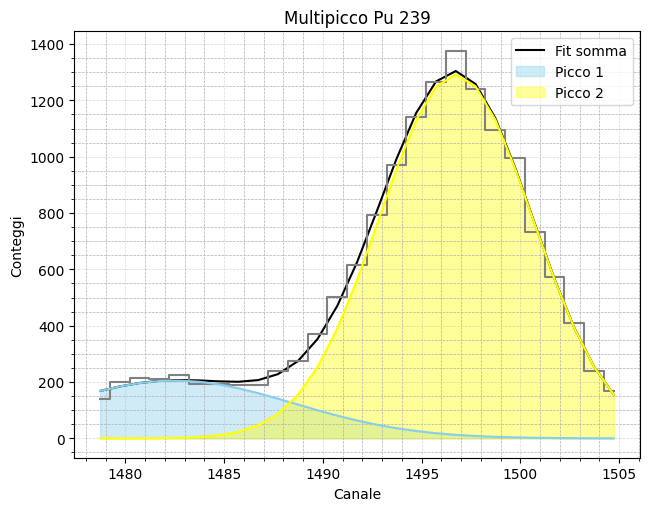

In [162]:
plt.plot(x_fit,somma_gauss(x_fit,*popt_s2),c='black' ,label='Fit somma')
#plt.scatter(x_fit,y_fit)
print(popt_s2)
print(np.diag(np.sqrt(pcov_s2)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray')
plt.fill_between(x_fit,gaussiana(x_fit,popt_s2[0],popt_s2[1],popt_s2[2]), color='skyblue', alpha=0.4, label="Picco 1")
plt.fill_between(x_fit,gaussiana(x_fit,popt_s2[3],popt_s2[4],popt_s2[5]), color='yellow', alpha=0.4, label="Picco 2")
plt.plot(x_fit,gaussiana(x_fit,popt_s2[0],popt_s2[1],popt_s2[2]), c='skyblue')
plt.plot(x_fit,gaussiana(x_fit,popt_s2[3],popt_s2[4],popt_s2[5]), c='yellow')
plt.legend()
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Multipicco Pu 239')
sigma = np.sqrt(y_fit)
residuals = y_fit - somma_gauss(x_fit, *popt_s2)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_s2)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

(1650.0, 1750.0)

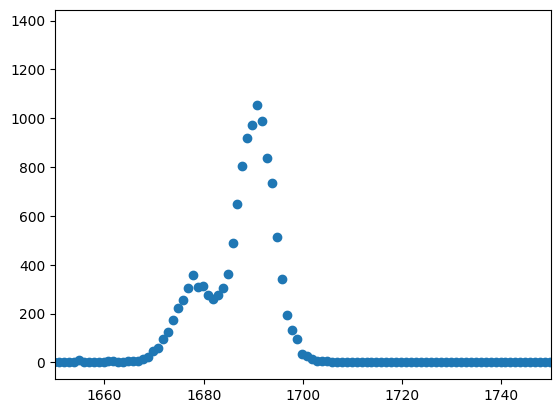

In [117]:
plt.scatter(Mca,matrice_dati[1])
plt.xlim(1650,1750)

In [168]:
y = np.array(matrice_dati[1])
x_min = 1685
x_max = 1700
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1690,7])
popt_3, pcov_3 = curve_fit(gaussiana,x_fit,y_fit,p0)


[1037.07073486 1690.47016841    3.6879185 ]
[13.77848954  0.0608448   0.06821317]
Chi-quadro: 23.004431211022684
Gradi di libertà: 12
p-value: 0.02768834616609983


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\3225108099.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_3)))


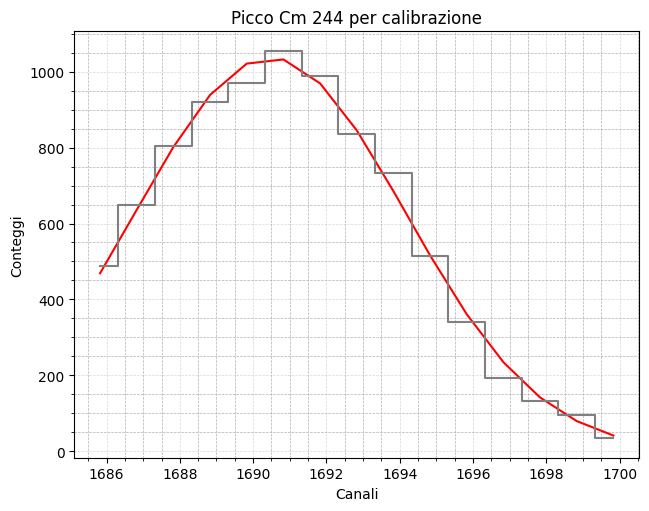

In [169]:
plt.plot(x_fit,gaussiana(x_fit,*popt_3), c='red')
#plt.scatter(x_fit,y_fit)
print(popt_3)
print(np.diag(np.sqrt(pcov_3)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
sigma = np.sqrt(y_fit)
residuals = y_fit - gaussiana(x_fit, *popt_3)
chi_squared = np.sum((residuals / sigma)**2)
plt.xlabel('Canali')
plt.ylabel('Conteggi')
plt.title('Picco Cm 244 per calibrazione')

# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_3)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

In [171]:
y = np.array(matrice_dati[1])
x_min = 1670
x_max = 1700
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1690,7,400,1675,7])
popt_s3, pcov_s3 = curve_fit(somma_gauss,x_fit,y_fit,p0)

[1035.52981233 1690.57391081    3.60100001  323.84356736 1678.20975808
    3.98884495]
[9.75547127 0.05230719 0.05352069 9.51579081 0.1724425  0.19585356]
Chi-quadro: 26.070396374043575
Gradi di libertà: 24
p-value: 0.3496026202968845


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\2361624395.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov_s3)))


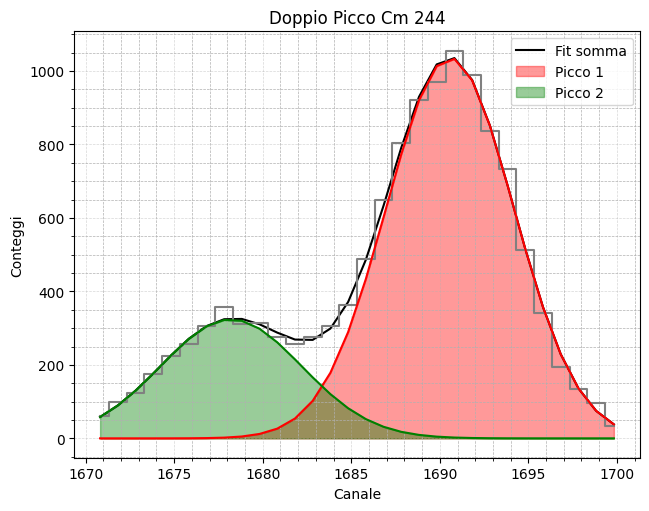

In [172]:
plt.plot(x_fit,somma_gauss(x_fit,*popt_s3), c='black', label='Fit somma')
#plt.scatter(x_fit,y_fit)
print(popt_s3)
print(np.diag(np.sqrt(pcov_s3)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray')
plt.fill_between(x_fit,gaussiana(x_fit,popt_s3[0],popt_s3[1],popt_s3[2]), color='red', alpha=0.4, label="Picco 1")
plt.fill_between(x_fit,gaussiana(x_fit,popt_s3[3],popt_s3[4],popt_s3[5]), color='green', alpha=0.4, label="Picco 2")
plt.plot(x_fit,gaussiana(x_fit,popt_s3[0],popt_s3[1],popt_s3[2]), c='red')
plt.plot(x_fit,gaussiana(x_fit,popt_s3[3],popt_s3[4],popt_s3[5]), c='green')
plt.legend()
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Doppio Picco Cm 244')
sigma = np.sqrt(y_fit)
residuals = y_fit - somma_gauss(x_fit, *popt_s3)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt_s3)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

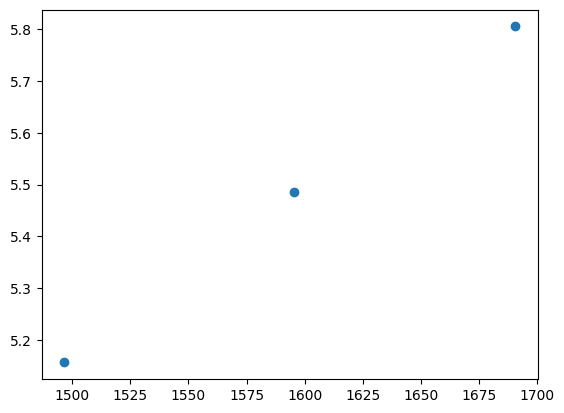

In [135]:
Canali = np.array([1496.60, 1595.59, 1690.51])
plt.scatter(Canali,Energie)
err_energie = np.array([3.98, 3.55, 3.81])

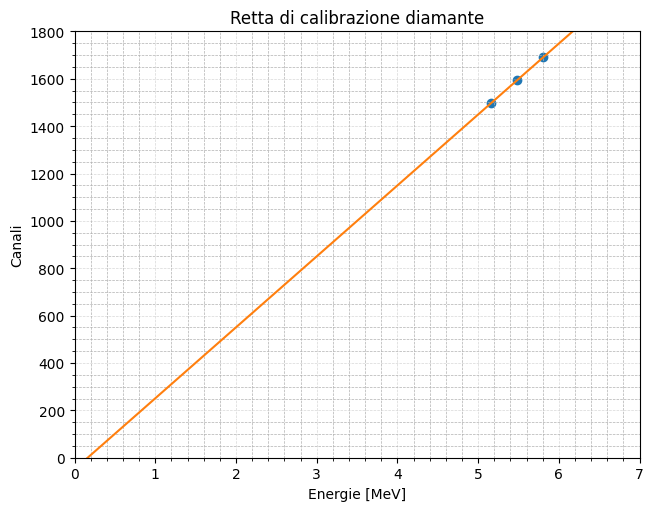

The function is the type Channel = Eenergy*a + b
parameter a for the line is = 299.60768700086345
parameter b for the line is = -48.802412558581295
error on parameter a is = 1.0013847192728274
error on parameter b is = 5.496647029894052
Chi-quadro: 0.015776897419248953
Gradi di libertà: 1
p-value: 0.9000437181499036


In [151]:
plt.errorbar(Energie, Canale,err_energie, linestyle='None')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.scatter(Energie,Canale)
Energie_plot = np.linspace(0,7,100)
popt, pcov = opt.curve_fit(retta, Energie, Canale)
plt.plot(Energie_plot, retta(Energie_plot, popt[0], popt[1]))
#plt.xlim(min(Canale) - 50, max(Canale) + 50)
#plt.ylim(min(Energie)- 0.5, max(Energie)+0.5)
#plt.xlim(0,1800)
plt.xlabel('Energie [MeV]')
plt.title('Retta di calibrazione diamante')
plt.ylabel('Canali')
#plt.ylim(0,7)
plt.ylim(0,1800)
plt.xlim(0,7)
plt.show()
error_a = math.sqrt(pcov[0][0])
error_b = math.sqrt(pcov[1][1])

print('The function is the type Channel = Eenergy*a + b')
print('parameter a for the line is =', popt[0])
print('parameter b for the line is =', popt[1])
print('error on parameter a is =', error_a)
print('error on parameter b is =', error_b)
sigma = err_energie
residuals = Canale - retta(Energie, *popt)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(Energie) - len(popt)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)


(0.0, 700.0)

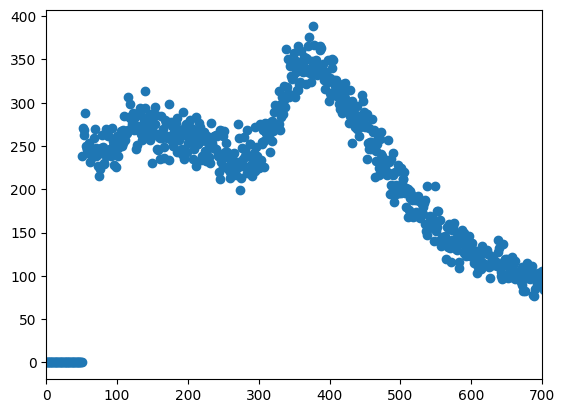

In [124]:
plt.scatter(Mca,matrice_dati[7])
#plt.ylim(0,100)
plt.xlim(0,700)

In [125]:
#Sorgente Na22


(0.0, 800.0)

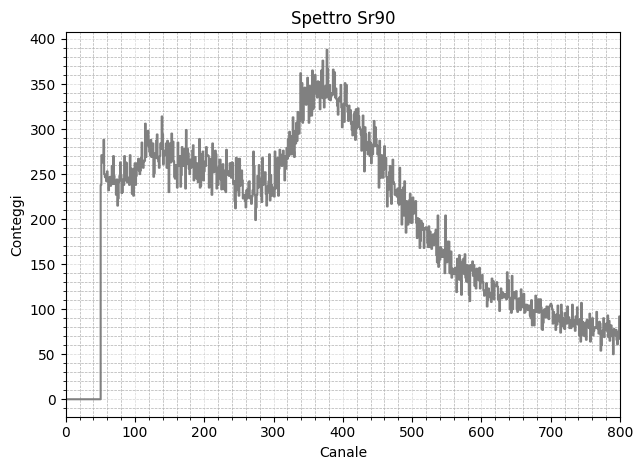

In [246]:
plt.plot(Mca, matrice_dati[7], drawstyle='steps-mid', color='gray')
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Spettro Sr90')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0,800)

(0.0, 100.0)

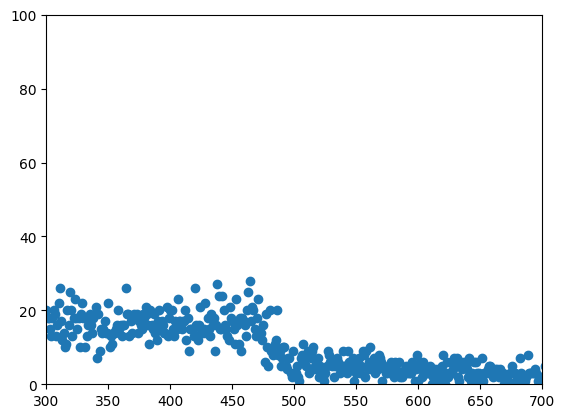

In [126]:
plt.scatter(Mca,matrice_dati[5])
sodio_schermato = np.array(matrice_dati[5])
sodio = np.array(matrice_dati[3])
plt.xlim(300,700)
plt.ylim(0,100)

In [236]:

x_min = 455
x_max = 520
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = sodio_schermato[mask]
p0 = np.array([20,470,10,0])
popt, pcov = curve_fit(sigmoide,x_fit,y_fit,p0)

[ 12.00226967 480.99507694  -5.39205601   5.75961052]
[1.98804094 2.86719102 2.60226241 0.96888218]
Chi-quadro: 134.90966519631914
Gradi di libertà: 61
p-value: 1.655673123046597e-07


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\3047089676.py:5: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


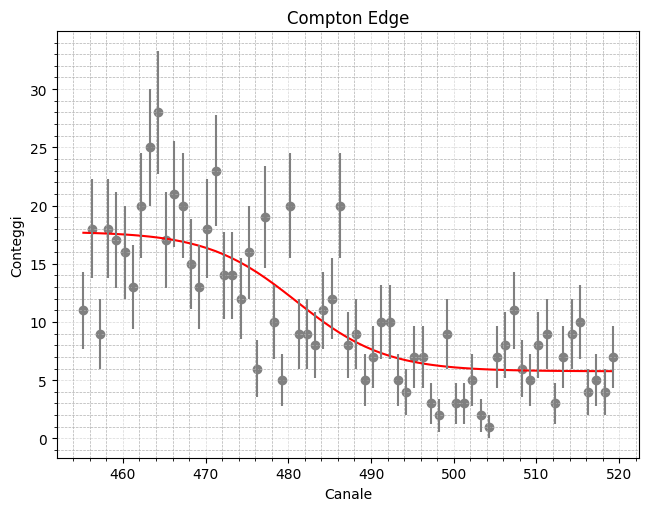

In [237]:
plt.plot(x_fit,sigmoide(x_fit,popt[0],popt[1],popt[2],popt[3]), c='red')
sigma = np.sqrt(y_fit)
#plt.scatter(x_fit,y_fit)
print(popt)
print(np.diag(np.sqrt(pcov)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.scatter(x_fit, y_fit, color='gray')
plt.errorbar(x_fit,y_fit,sigma,color='gray', linestyle='None')
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Compton Edge')

residuals = y_fit - sigmoide(x_fit, *popt)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

In [231]:
x_min = 462
x_max = 509
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = sodio_schermato[mask]
p0 = np.array([20,470,10,0])
popt, pcov = curve_fit(sigmoide,x_fit,y_fit,p0)

[-111.39244091  436.06472613   17.58668037  114.34878791]
[1147.8003312   259.77493658   32.12961701 1141.43030834]
Chi-quadro: 94.09826796007427
Gradi di libertà: 43
p-value: 1.1139283312200376e-05


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\1982554227.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


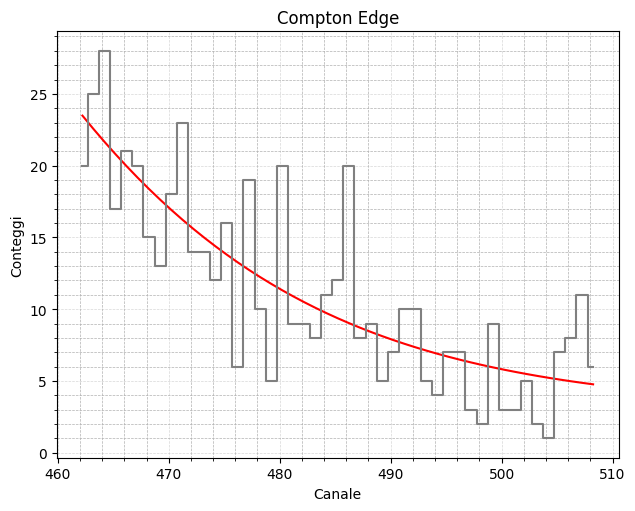

In [232]:
plt.plot(x_fit,sigmoide(x_fit,popt[0],popt[1],popt[2],popt[3]), c='red')
#plt.scatter(x_fit,y_fit)
print(popt)
print(np.diag(np.sqrt(pcov)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray')
plt.xlabel('Canale')
plt.ylabel('Conteggi')
plt.title('Compton Edge')
sigma = np.sqrt(y_fit)
residuals = y_fit - sigmoide(x_fit, *popt)
chi_squared = np.sum((residuals / sigma)**2)


# 5. Gradi di libertà = numero dati - numero parametri
dof = len(x_fit) - len(popt)

# 6. p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# 7. Risultati
print("Chi-quadro:", chi_squared)
print("Gradi di libertà:", dof)
print("p-value:", p_value)

In [129]:
#Calibrazione Cesio


In [241]:
Energy_cesio = np.array([0.624, 0.656])
channel = np.array([879.649, 925.449])
channel_err = np.array([13.3, 14.7])


C:\Users\ACER\AppData\Local\Temp\ipykernel_11092\882321477.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(retta,Energia_Cesio,channel)


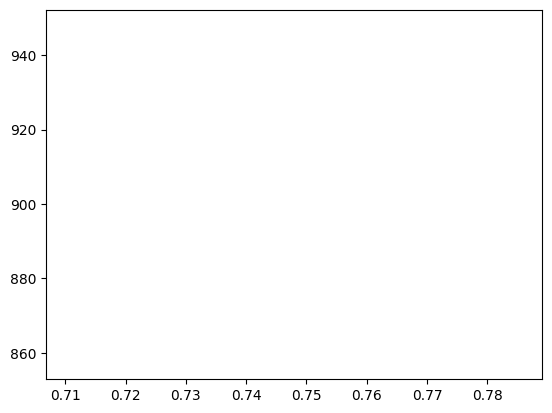

In [ ]:
popt, pcov = curve_fit(retta,Energia_Cesio,channel)
plt.plot(Energia_Cesio,retta(Energia_Cesio,*popt))
plt.scatter(Energia_Cesio,)